In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as py
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dropout,Dense
from keras.models import Sequential

In [2]:
#To access the files
#from google.colab import files
#uploaded = files.upload()

In [3]:
data=pd.read_csv('/content/Tesla.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-02-28,21.261333,21.333332,20.720667,21.325333,21.325333,157810500
1,2019-03-01,20.462667,20.475332,19.459999,19.652666,19.652666,343671000
2,2019-03-04,19.874666,19.933332,18.851999,19.024000,19.024000,256452000
3,2019-03-05,18.799999,18.933332,18.006666,18.436001,18.436001,281470500
4,2019-03-06,18.431999,18.767332,18.292667,18.416000,18.416000,155032500
...,...,...,...,...,...,...,...
1254,2024-02-22,194.000000,198.320007,191.360001,197.410004,197.410004,92739500
1255,2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78841900
1256,2024-02-26,192.289993,201.779999,192.000000,199.399994,199.399994,111747100
1257,2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400


In [4]:
# Data split
train=data.iloc[:800,1:2].values
test=data.iloc[800:,1:2].values

In [5]:
mm_scale=MinMaxScaler(feature_range=(0,1))
training_scale=mm_scale.fit_transform(train)

In [6]:
x_train=[]
y_train=[]
for i in range(60,800):
  x_train.append(training_scale[i-60:i,0])
  y_train.append(training_scale[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [7]:
#Model Architecture
model=Sequential()

#Building Model
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [8]:
# compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')
#fitting values to model
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
24/24 [==============================] - 15s 18ms/step - loss: 0.0489
Epoch 2/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0072
Epoch 3/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0073
Epoch 4/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0065
Epoch 5/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0059
Epoch 6/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0058
Epoch 7/50
24/24 [==============================] - 0s 14ms/step - loss: 0.0060
Epoch 8/50
24/24 [==============================] - 0s 17ms/step - loss: 0.0056
Epoch 9/50
24/24 [==============================] - 0s 17ms/step - loss: 0.0047
Epoch 10/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 11/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0045
Epoch 12/50
24/24 [==============================] - 0s 13ms/step - loss: 0.0046
Epoch 13/50
24/24 [=================

In [10]:
#preparing test data
train_data= data.iloc[:800,1:2]
test_data=data.iloc[800:,1:2]
total_data=pd.concat((train_data,test_data),axis=0)
inputs=total_data[len(total_data) - len(test_data) - 60:].values
inputs=inputs.reshape(-1,1)
inputs=mm_scale.transform(inputs)

In [12]:
total_data

,Open
0,21.261333
1,20.462667
2,19.874666
3,18.799999
4,18.431999
...,...
1254,194.000000
1255,195.309998
1256,192.289993
1257,204.039993


In [13]:
inputs

array([[0.70588137],
       [0.71858386],
       [0.74075896],
       [0.7255193 ],
       [0.75011473],
       [0.72788959],
       [0.72894113],
       [0.68883066],
       [0.72090403],
       [0.73263001],
       [0.73197075],
       [0.70921976],
       [0.66592945],
       [0.66284145],
       [0.55431108],
       [0.64514813],
       [0.64997207],
       [0.69559921],
       [0.69764392],
       [0.70318565],
       [0.67842327],
       [0.68443231],
       [0.63371418],
       [0.67039449],
       [0.68038461],
       [0.67099545],
       [0.62126208],
       [0.61680536],
       [0.64495611],
       [0.66330884],
       [0.6996136 ],
       [0.73340625],
       [0.74594179],
       [0.78762133],
       [0.81248381],
       [0.81103998],
       [0.85869518],
       [0.89449082],
       [0.880453  ],
       [0.88329061],
       [0.8720904 ],
       [0.87895912],
       [0.91811815],
       [0.86568073],
       [0.84808752],
       [0.84042597],
       [0.78800521],
       [0.802

In [11]:
x_test=[]
for i in range(60,519):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

#prediction
stock_price_predicted=model.predict(x_test)
stock_price_predicted=mm_scale.inverse_transform(stock_price_predicted)

15/15 [==============================] - 2s 8ms/step


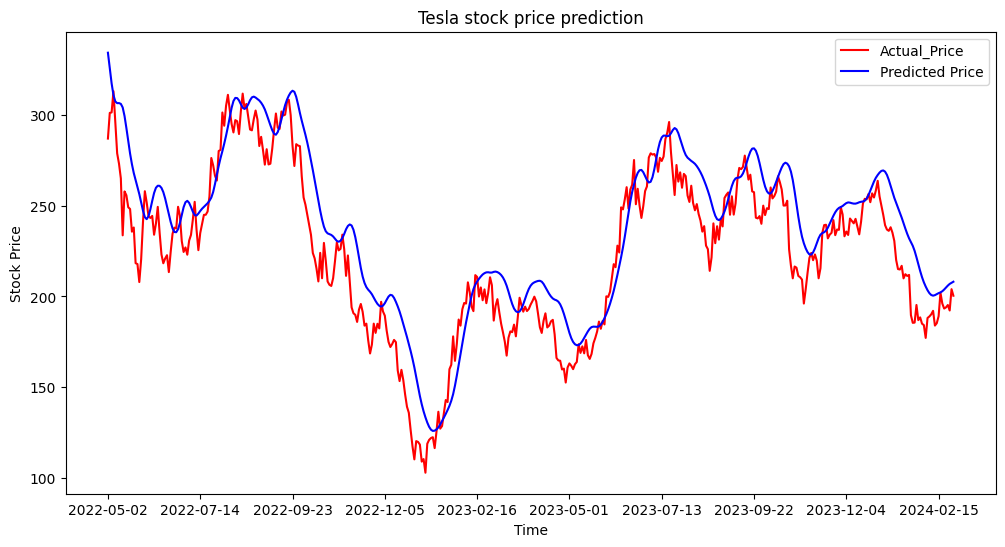

In [17]:
#visualization
py.figure(figsize=(12,6))
py.plot(data.loc[800:,"Date"],test_data.values,color="red",label="Actual_Price")
py.plot(data.loc[800:,"Date"],stock_price_predicted,color="blue",label="Predicted Price")
py.xticks(np.arange(0,459,50))
py.title('Tesla stock price prediction')
py.xlabel('Time')
py.ylabel('Stock Price')
py.legend()
py.show()